In [1]:
#################################################
################  Import things #################
#################################################

import numpy as np
import timeit
import random
import copy
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
from scipy import stats
import glycowork
import pandas as pd

from glycowork.glycan_data.loader import glycan_binding as gb
from glycowork.glycan_data.loader import df_glycan as df_glycan
from glycowork.glycan_data.loader import glycomics_data_loader

In [7]:
import glycowork.motif as motif
print("Motif module attributes:", dir(motif))
#print("Motif module attributes:", dir(glycowork))

Motif module attributes: ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'annotate', 'draw', 'graph', 'processing', 'regex', 'tokenization']


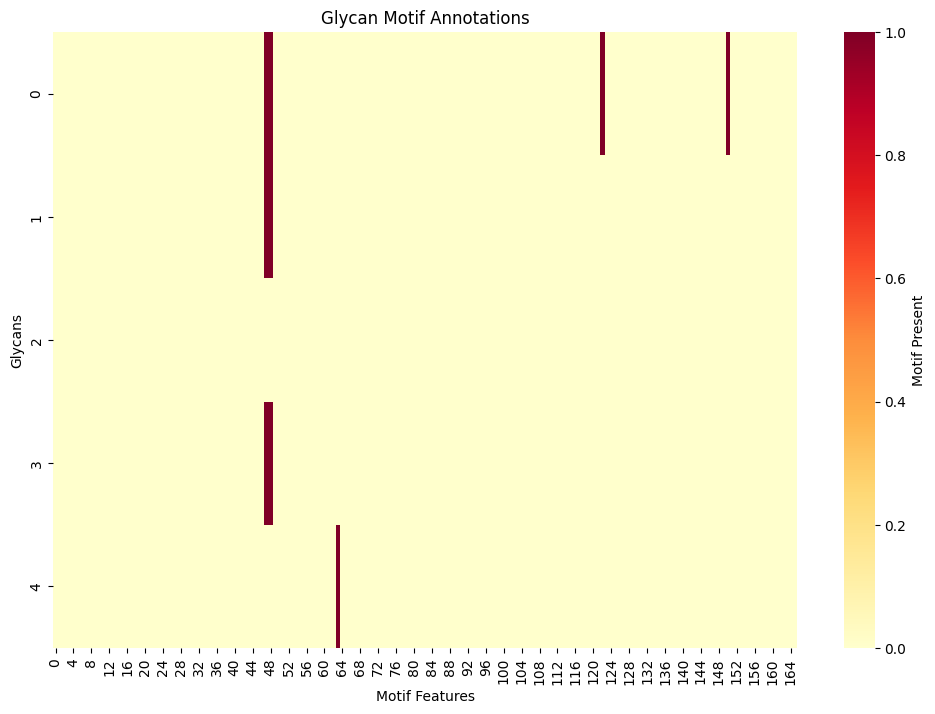

In [24]:
# Convert annotations to array and create heatmap
import seaborn as sns

annotations = np.array([motif.annotate.annotate_glycan(glycan).values.squeeze() for glycan in glycans])

plt.figure(figsize=(12,8))
sns.heatmap(annotations, cmap='YlOrRd', cbar_kws={'label': 'Motif Present'})
plt.xlabel('Motif Features')
plt.ylabel('Glycans')
plt.title('Glycan Motif Annotations')
plt.show()

In [14]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = analysis.get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]
print(out)

Glyco-Motif enrichment p-value test
                 motif      pval  corr_pval  effect_size
4               GlcNAc  0.038120   0.205849     1.530905
8                  Man  0.054356   0.234990     1.390253
24        Man(a1-?)Man  0.060923   0.234990     1.308333
22        Man(a1-3)Man  0.034212   0.205849     1.196586
14  GlcNAc(b1-4)GlcNAc  0.019543   0.175885     1.168815
23        Man(a1-6)Man  0.019543   0.175885     1.168815
25     Man(b1-4)GlcNAc  0.019543   0.175885     1.168815
7                  Kdo  0.328790   0.479672    -0.811679
2                  Glc  0.644180   0.668956    -0.811679
21        Man(a1-2)Man  0.177461   0.479672     0.772320


In [15]:
# Get all dataset names (strings)
datasets = dir(glycomics_data_loader)

# Optional: filter out private/internal attributes
datasets = [name for name in datasets if not name.startswith('_')]

# Loop through each dataset
for name in datasets:
    # Get the DataFrame object from the loader
    df = getattr(glycomics_data_loader, name)

    print(name)
    print(len(df.columns))
    print(df.columns)


HIV_gagtransfection_N_PMID35112714
13
Index(['glycan', 'nontransfected_1', 'nontransfected_2', 'nontransfected_3',
       'nontransfected_4', 'mocktransfected_1', 'mocktransfected_2',
       'mocktransfected_3', 'mocktransfected_4', 'gagtransfected_1',
       'gagtransfected_2', 'gagtransfected_3', 'gagtransfected_4'],
      dtype='object')
HIV_gagtransfection_O_PMID35112714
13
Index(['glycan', 'nontransfected_1', 'nontransfected_2', 'nontransfected_3',
       'nontransfected_4', 'mocktransfected_1', 'mocktransfected_2',
       'mocktransfected_3', 'mocktransfected_4', 'gagtransfected_1',
       'gagtransfected_2', 'gagtransfected_3', 'gagtransfected_4'],
      dtype='object')
human_brain_GSL_PMID38343116
11
Index(['glycan', 'GSL_Control_1', 'GSL_Control_2', 'GSL_Control_3',
       'GSL_Control_4', 'GSL_SSSMuG_1', 'GSL_SSSMuG_2', 'GSL_SSSMuG_3',
       'GSL_SSSMuG_4', 'GSL_SSSMuG_5', 'GSL_SSSMuG_6'],
      dtype='object')
human_brain_N_PMID38343116
11
Index(['glycan', 'NG_Control_1', '

In [109]:
df = glycomics_data_loader.human_prostate_O_PMC8010466
glycans_in_df = list(df['glycan'])
glycans_in_df = [gly for gly in glycans_in_df if '{' not in gly]
print(len(glycans_in_df))
glycan_mask = [gly in gb.columns for gly in glycans_in_df]
print(glycan_mask)
for gly in glycans_in_df:
    print(gly, get_affinity_relative(gly, emb))


8
[True, True, True, True, False, True, True, False]
Fuc(a1-2)Gal(b1-3)GalNAc Fuc(a1-2)Gal(b1-3)GalNAc
Gal(b1-3)[Neu5Ac(a2-6)]GalNAc Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc
Gal(b1-3)[GlcNAc(b1-6)]GalNAc Gal(b1-3)[GlcNAc(b1-6)]GalNAc


KeyError: 'Gal(b1-3)[Gal(?1-?)]GalNAc'

In [11]:
df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe
glycans_in_df = list(df['glycan'])
print(glycans_in_df)

['GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc', 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc']


In [30]:
df.head()

,glycan,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,control_6,tumor_6,control_7,tumor_7,control_8,tumor_8,control_9,tumor_9
0,GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc,2.755913,0.620301,3.019806,4.148615,2.413021,0.424605,1.764977,0.744528,4.518547,0.849240,3.174455,1.543922,3.752813,1.287601,1.574444,0.627539,4.415230,0.425039
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.775234,0.178490,0.778083,0.832907,0.824018,0.410873,0.617573,2.133773,0.603573,0.544599,1.317444,1.256997,0.860332,0.340373,0.927956,0.494144,1.045950,0.590404
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,9.219494,8.436141,16.190721,11.032313,16.061363,8.133529,12.291188,10.143781,10.865172,14.353894,12.313024,11.601938,13.246380,8.352032,12.352587,9.731834,16.170263,12.693331
3,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.770825,0.944913,1.531698,2.427562,1.570204,2.066165,2.832475,2.508954,2.228299,1.757840,4.811796,3.641077,1.437487,1.470697,2.324956,2.192553,0.805130,1.100490
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,35.912676,30.058418,48.420833,43.738436,46.692847,26.728713,39.971128,32.290024,51.472292,40.669153,41.927351,37.755641,43.701528,32.565498,47.145757,38.565763,44.683562,33.532942


In [74]:
glycans_in_df_and_not_gb = [gly for gly, mask in zip(glycans_in_df, glycan_mask) if not mask]
print(glycans_in_df_and_gb)
print(glycans_in_df_and_not_gb)


['Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc']
['GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc', 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc']


In [2]:
prot_seq_list = []
prot_seq_list.append(gb[gb['protein'] == "ConA"]['target'].iloc[0])
prot_seq_list.append(gb[gb['protein'] == "WGA"]['target'].iloc[0])

p_ind_1 = 33
p_ind_2 = 40
prot_1 = gb['protein'].iloc[p_ind_1]
print(prot_1)
prot_2 = gb['protein'].iloc[p_ind_2]
print(prot_2)
prot_seq_list.append(gb[gb['protein'] == prot_1]['target'].iloc[0])
prot_seq_list.append(gb[gb['protein'] == prot_2]['target'].iloc[0])

# Filter glycans_in_df to only include those that exist in gb.columns
# Get mask of glycans that exist in both dataframes
glycan_mask = [gly in gb.columns for gly in glycans_in_df]
glycans_in_df_and_gb = [gly for gly, mask in zip(glycans_in_df, glycan_mask) if mask]

n_gly = len(glycans_in_df_and_gb)
n_prots = len(prot_seq_list)
z_score_mat = np.zeros((n_prots, n_gly))


for (p, prot_seq) in enumerate(prot_seq_list):
    prot_row = gb[gb['target'] == prot_seq]
    for (i, gly) in enumerate(glycans_in_df_and_gb):
        #if gly in prot_row.columns:
        gly_ind = glycans_in_df.index(gly)
        z_score_mat[p, i] = 0 if np.isnan(prot_row[gly].to_numpy()) else prot_row[gly]

# Create heatmap
plt.figure(figsize=(10, 6))
plt.imshow(z_score_mat, aspect='auto', cmap='RdBu_r')
plt.colorbar(label='Z-score')

# Add labels
plt.xlabel('Glycans')
plt.ylabel('Proteins')
plt.title('Protein-Glycan Binding Z-scores')

# Add protein labels
plt.yticks([0, 1], ['ConA', 'WGA'])

# Rotate x-axis labels for readability if needed
plt.xticks(range(len(glycans_in_df_and_gb)), glycans_in_df_and_gb, rotation=45, ha='right')

plt.tight_layout()
plt.show()

DGL
Mannose Binding Protein


NameError: name 'glycans_in_df' is not defined

In [72]:
z_score_mat

array([[-0.39132203, -0.5347117 , -0.53177955, -0.27891915,  0.        ,
        -0.32127398, -0.31611426],
       [-0.29980114,  0.93509258,  0.60307239, -0.16534969,  0.        ,
        -0.35691953, -0.15127527]])

[[-0.39132203 -0.5347117  -0.53177955 -0.27891915  0.         -0.32127398
  -0.31611426]
 [-0.29980114  0.93509258  0.60307239 -0.16534969  0.         -0.35691953
  -0.15127527]]


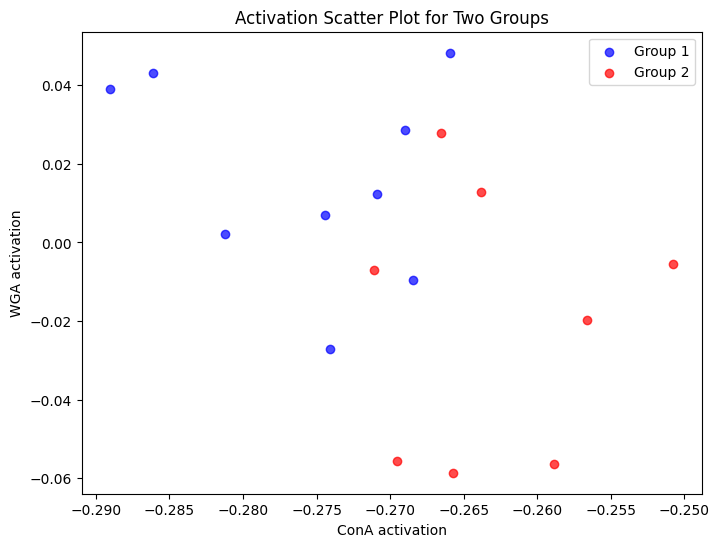

In [112]:
#aff_mat = np.heaviside(z_score_mat + 0.2, 0)
aff_mat = z_score_mat
#aff_mat = np.exp(0.2 * z_score_mat)
print(aff_mat)

def prob_dist(vals):
    return vals / np.sum(vals)

group1_list = list(df.columns)[1:-1:2]
group2_list = list(df.columns)[2:-1:2]


activation1_array = np.zeros((len(group1_list), 2))
for (i, g) in enumerate(group1_list):
    glycan_dist = prob_dist(np.array(df[g]))[glycan_mask]
    activation1_array[i,:] = np.dot(aff_mat, glycan_dist)


activation2_array = np.zeros((len(group2_list), 2))
for (i, g) in enumerate(group2_list):
    glycan_dist = prob_dist(np.array(df[g]))[glycan_mask]
    activation2_array[i,:] = np.dot(aff_mat, glycan_dist)

# Plot scatter plots for both groups
plt.figure(figsize=(8, 6))
plt.scatter(activation1_array[:,0], activation1_array[:,1], color='blue', label='Group 1', alpha=0.7)
plt.scatter(activation2_array[:,0], activation2_array[:,1], color='red', label='Group 2', alpha=0.7)

# Labels and legend
plt.xlabel('ConA activation')
plt.ylabel('WGA activation')
plt.title('Activation Scatter Plot for Two Groups')
plt.legend()
plt.show()

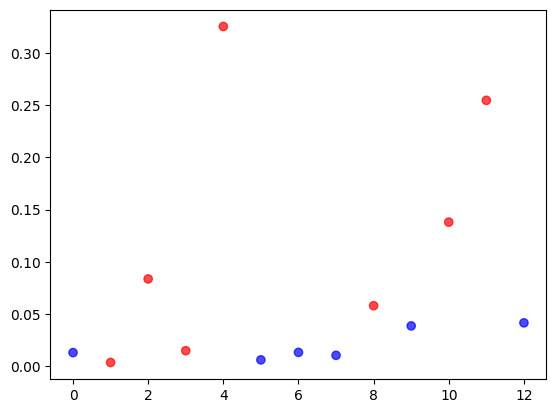

In [113]:
g = group2_list[6]

glycan_dist = prob_dist(np.array(df[g]))
plt.scatter(range(len(glycan_dist)), glycan_dist, c=glycan_mask, cmap='bwr', alpha=0.7) # False is blue

Measured binding code

In [4]:
conditions_df = glycomics_data_loader.human_skin_O_PMC5871710 # imports as a Pandas dataframe
glycans_in_df = list(conditions_df['glycan'])
print(glycans_in_df)

['GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc', 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc']


In [5]:
from typing import Any, Dict, List, Optional, Tuple, Union
from pathlib import Path
from sklearn.manifold import TSNE

glycans_in_gb = list(gb.columns)


def get_embeddings(
   glycans: List[str], # List of IUPAC-condensed glycan sequences
   emb: Optional[Union[Dict[str, np.ndarray], pd.DataFrame]] = None, # Glycan embeddings dict/DataFrame; defaults to SweetNet embeddings
   label_list: Optional[List[Any]] = None, # Labels for coloring points
   shape_feature: Optional[str] = None, # Monosaccharide/bond for point shapes
   filepath: Union[str, Path] = '', # Path to save plot
   alpha: float = 0.8, # Point transparency
   palette: str = 'colorblind', # Color palette for groups
   **kwargs: Any # Keyword args passed to seaborn scatterplot
   ) -> None:
    "Visualizes learned glycan embeddings using t-SNE dimensionality reduction with optional group coloring"
    idx = [i for i, g in enumerate(glycans) if '{' not in g]
    glycans = [glycans[i] for i in idx]
    if label_list is not None:
      label_list = [label_list[i] for i in idx]
    # Get all glycan embeddings
    if emb is None:
      if not Path('glycan_representations_v1_4.pkl').exists():
          download_model("https://drive.google.com/file/d/1--tf0kyea9jFLfffUtICKkyIw36E9hJ3/view?usp=sharing", local_path = 'glycan_representations_v1_4.pkl')
      emb = pickle.load(open('glycan_representations_v1_4.pkl', 'rb'))
    # Get the subset of embeddings corresponding to 'glycans'
    #embs = emb.values if isinstance(emb, pd.DataFrame) else np.vstack([emb[g] for g in glycans])
    if isinstance(emb, pd.DataFrame):
      embs = emb.values
      glycans_used = glycans
    else:
      glycans_used = [g for g in glycans if g in emb]
      embs = np.vstack([emb[g] for g in glycans_used])
    # Calculate t-SNE of embeddings
    n_samples = embs.shape[0]
    perplexity = min(30, n_samples - 1)
    embs = TSNE(random_state = 42, perplexity = perplexity,
                init = 'pca', learning_rate = 'auto').fit_transform(embs)
    return embs, glycans_used


    


In [6]:

emb = pickle.load(open('glycan_representations_v1_4.pkl', 'rb'))
embs, glycans_in_gb_and_emb = get_embeddings(glycans_in_gb)
emb_dict = dict(zip(glycans_in_gb_and_emb, embs))


def get_affinity_relative(glycan, prot_row, emb, threshold = 0.5, force_nearest = False, no_nan = False):
    # Step 1: If the glycan is in the reference set and we are not forcing nearest neighbor search,
    #         return the glycan itself and True (indicating a direct match).
    if (glycan in glycans_in_gb) and (not force_nearest) and ((not no_nan) or (not np.isnan(prot_row[glycan].to_numpy()[0]))):
        return glycan, True
    else:
        # Step 2: Otherwise, get the embedding vector for the input glycan.
        embedding = np.array(emb[glycan])
        # Step 3: Initialize variables to track the minimum distance and the closest glycan found so far.
        min_dist = float('inf')
        closest_glycan = None
        # Step 4: Iterate over all glycans in the reference set that have embeddings.
        for g in glycans_in_gb_and_emb:
            # Step 5: If not forcing nearest, skip the input glycan itself.
            if g != glycan or not force_nearest:
                # Step 6: Compute the Euclidean distance between the input glycan and the current glycan.
                dist = np.linalg.norm(embedding - np.array(emb[g]))
                # Step 7: If this is the smallest distance so far, and (optionally) the protein row is not NaN,
                #         update the closest glycan and minimum distance.
                if dist < min_dist:
                    if not no_nan or not np.isnan(prot_row[g].to_numpy()[0]):
                        min_dist = dist
                        closest_glycan = g
        # Step 8: Return the closest glycan and whether its distance is below the threshold.
        return closest_glycan, min_dist < threshold
    

    
def get_nearest_affinity(glycan, prot_row, emb, threshold = 0.5, force_nearest = False, no_nan = False):
    aff_gly, is_close = get_affinity_relative(glycan, prot_row, emb, threshold, force_nearest, no_nan)
    if is_close:
        aff = prot_row[aff_gly].to_numpy()[0]
    else:
        aff = np.nan
    return aff, aff_gly==glycan

def get_affinity(glycan, prot_row):
    if glycan in prot_row.columns:
        return prot_row[glycan].to_numpy()[0]
    else:
        print("not in prot_row")
        return np.nan


# test_glycan = glycans_in_df[1]
# print(test_glycan)
# get_affinity_relative(test_glycan, emb_use)
# prot_row = gb[gb['protein'] == "ConA"]
# aff_true = get_affinity(test_glycan, prot_row)
# aff_nearest, is_close = get_nearest_affinity(test_glycan, prot_row, emb_use, True)

# print(aff_true, aff_nearest, is_close)

emb_use = emb_dict
aff_true_list = []
aff_nearest_list = []
p_ind_1 = 15
prot_1 = gb['protein'].iloc[p_ind_1]
prot_row = gb[gb['protein'] == "WGA"]
threshold = 0.5
force_nearest = True
no_nan = False
# prot_row = gb[gb['protein'] == prot_1]

for gly in glycans_in_gb_and_emb:
    aff_true = get_affinity(gly, prot_row)
    aff_nearest, is_glycan = get_nearest_affinity(gly, prot_row, emb_use, threshold, force_nearest, no_nan)
    aff_true_list.append(aff_true)
    aff_nearest_list.append(aff_nearest)




C:\Users\csfloyd\AppData\Local\Temp\ipykernel_10652\3667816542.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(embs[:,0], embs[:,1], c=np.log(aff_true_list), cmap='bwr', alpha=0.7)


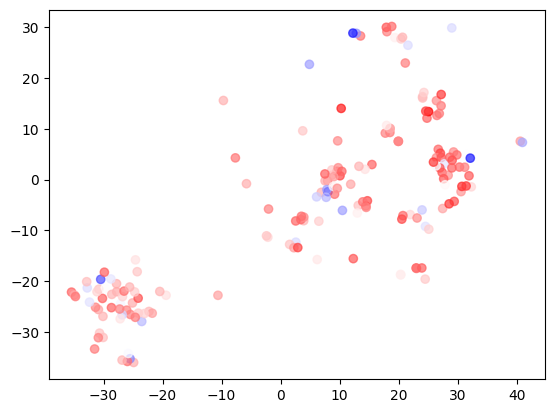

In [166]:
plt.scatter(embs[:,0], embs[:,1], c=np.log(aff_true_list), cmap='bwr', alpha=0.7)


91 91


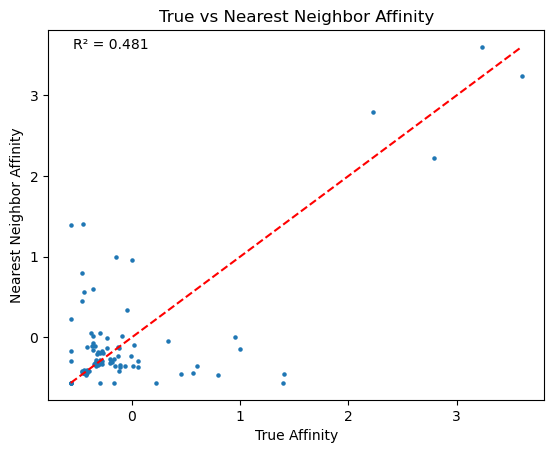

In [7]:
# Remove pairs where either value is nan
aff_true_array = np.array(aff_true_list)
aff_nearest_array = np.array(aff_nearest_list)
valid_indices = ~(np.isnan(aff_true_array) | np.isnan(aff_nearest_array))
aff_true_list = aff_true_array[valid_indices].tolist()
aff_nearest_list = aff_nearest_array[valid_indices].tolist()
print(len(aff_true_list), len(aff_nearest_list))

plt.scatter(aff_true_list, aff_nearest_list, s=5)
from scipy.stats import pearsonr
r, _ = pearsonr(aff_true_list, aff_nearest_list)
rsq = r**2
plt.text(0.05, 0.95, f'R² = {rsq:.3f}', transform=plt.gca().transAxes)

plt.plot([min(aff_true_list), max(aff_true_list)], [min(aff_true_list), max(aff_true_list)], 'r--')
plt.xlabel('True Affinity')
plt.ylabel('Nearest Neighbor Affinity')
plt.title('True vs Nearest Neighbor Affinity')
#plt.xlim(-2, 4)
#plt.ylim(-2, 4)
plt.show()

In [8]:
prot_seq_list = []
prot_seq_list.append(gb[gb['protein'] == "ConA"]['target'].iloc[0])

n_gly = len(glycans_in_df)
n_prots = len(prot_seq_list)
z_score_mat = np.zeros((n_prots, n_gly))

for (p, prot_seq) in enumerate(prot_seq_list):
    prot_row = gb[gb['target'] == prot_seq]
    for (i, gly) in enumerate(glycans_in_df):
        gly = get_affinity_relative(gly)
        z_score_mat[p, i] = 0 if np.isnan(prot_row[gly].to_numpy()) else prot_row[gly]

print(z_score_mat)

TypeError: get_affinity_relative() missing 2 required positional arguments: 'prot_row' and 'emb'

-0.328953818
[[6.59754791378543, -0.19848158100000002], [7.067057115504456, -0.19746069700000002], [4.528015229578784, -0.20376686199999994], [4.947831972857653, -0.0006884169999999967], [4.476932338904384, 0.247046128], [7.333083122905269, -0.416593762], [8.02116404984635, 0.10128231500000001], [4.615026552544245, -0.011323417000000002], [5.570422074857259, -0.004023840000000001], [6.857935106485864, 0.665950848], [6.696898777176899, 0.7627443730000001], [6.901570739115987, 0.328953818], [4.934346799709095, 0.02606632600000003], [4.999863851258489, 0.013418810000000003], [5.306810065277728, 0.10763873500000001], [6.340673574488233, 0.08453233200000002], [7.240363895534483, 0.328953818], [3.594123541714957, 0.012482060000000017], [4.619693983484045, 0.083041959], [6.5761960820003456, -0.010200873999999971], [7.021250856081155, -0.20647488199999997], [5.623846598722036, -0.19147886400000003], [7.615619853246843, 0.12705817800000002], [5.0140108782865775, -0.20031784200000002], [5.733947

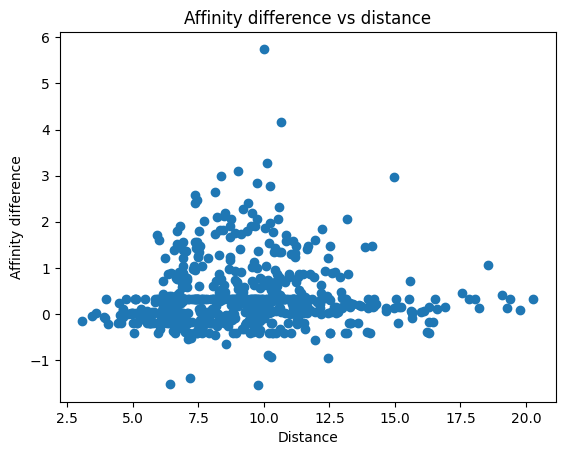

Affinity difference for closest glycan: -0.15606953499999998


In [202]:
test_gly = glycans_in_gb_and_emb[15]
embedding = np.array(emb[test_gly])
prot_seq_list = []
prot_seq_list.append(gb[gb['protein'] == "WGA"]['target'].iloc[0])
prot_seq = prot_seq_list[0]
aff = prot_row[test_gly].to_numpy()[0]

print(aff)

pairs_list = []
for gly in glycans_in_gb_and_emb:
    if gly != test_gly:
        new_embedding = np.array(emb[gly])
        dist = np.linalg.norm(embedding - new_embedding)
        new_aff = 0 if np.isnan(prot_row[gly].to_numpy()) else prot_row[gly].to_numpy()[0]
        pairs_list.append([dist, new_aff - aff])

print(pairs_list)
plt.scatter([p[0] for p in pairs_list], [p[1] for p in pairs_list])
plt.xlabel('Distance')
plt.ylabel('Affinity difference')
plt.title('Affinity difference vs distance')
plt.show()
min_dist_pair = min(pairs_list, key=lambda x: x[0])
print(f"Affinity difference for closest glycan: {min_dist_pair[1]}")



Mannose Binding Protein
A/PRG921
0
GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc 0.472273799
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc 0.472273799
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc -0.318704031
Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]GalNAc -0.47884172
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc -0.349075522
Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc -0.47884172
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc -0.47884172
1
GalOS(b1-3)[Neu5Ac(a2-6)]GalNAc 0.002148039
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc 0.002148039
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc -0.188727926
Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc6S(b1-6)]GalNAc 0.096923605
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Gal(b1-3)]GalNAc -0.125896877
Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc 0.057728925
Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc -0.125896877


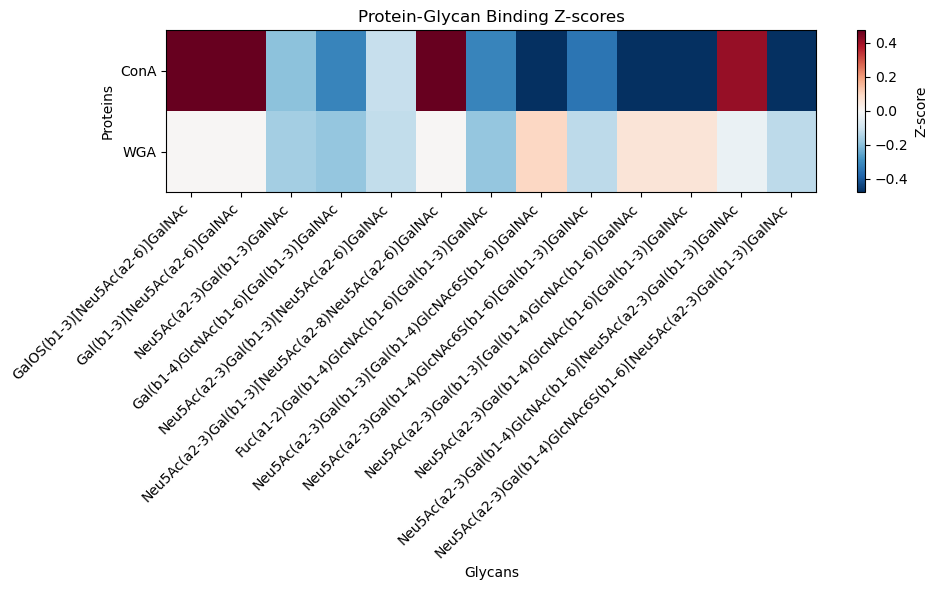

In [13]:
prot_seq_list = []


# prot_seq_list.append(gb[gb['protein'] == "ConA"]['target'].iloc[0])
# prot_seq_list.append(gb[gb['protein'] == "WGA"]['target'].iloc[0])

p_ind_1 = 40
p_ind_2 = 60
prot_1 = gb['protein'].iloc[p_ind_1]
print(prot_1)
prot_2 = gb['protein'].iloc[p_ind_2]
print(prot_2)
prot_seq_list.append(gb[gb['protein'] == prot_1]['target'].iloc[0])
prot_seq_list.append(gb[gb['protein'] == prot_2]['target'].iloc[0])

# Filter glycans_in_df to only include those that exist in gb.columns
# Get mask of glycans that exist in both dataframes
# glycan_mask = [gly in gb.columns for gly in glycans_in_df]
# glycans_in_df_and_gb = [gly for gly, mask in zip(glycans_in_df, glycan_mask) if mask]

n_gly = len(glycans_in_df)
n_prots = len(prot_seq_list)
z_score_mat = np.zeros((n_prots, n_gly))
force_nearest = False
no_nan = True

for (p, prot_seq) in enumerate(prot_seq_list):
    prot_row = gb[gb['target'] == prot_seq]
    print(p)
    for (i, gly) in enumerate(glycans_in_df):
        aff, is_glycan = get_nearest_affinity(gly, prot_row, emb, 10, force_nearest, no_nan)
        if not is_glycan:
            print(gly, aff)
        z_score_mat[p, i] = 0 if np.isnan(aff) else aff

# Create heatmap
plt.figure(figsize=(10, 6))
plt.imshow(z_score_mat, aspect='auto', cmap='RdBu_r')
plt.colorbar(label='Z-score')

# Add labels
plt.xlabel('Glycans')
plt.ylabel('Proteins')
plt.title('Protein-Glycan Binding Z-scores')

# Add protein labels
plt.yticks([0, 1], ['ConA', 'WGA'])

# Rotate x-axis labels for readability if needed
plt.xticks(range(len(glycans_in_df)), glycans_in_df, rotation=45, ha='right')

plt.tight_layout()
plt.show()

[[ 0.4722738   0.4722738  -0.19738517 -0.31870403 -0.1129013   0.4722738
  -0.31870403 -0.47884172 -0.34907552 -0.47884172 -0.47884172  0.4101872
  -0.47884172]
 [ 0.00214804  0.00214804 -0.16343907 -0.18872793 -0.12017635  0.00214804
  -0.18872793  0.0969236  -0.12589688  0.05772893  0.05772893 -0.03389355
  -0.12589688]]


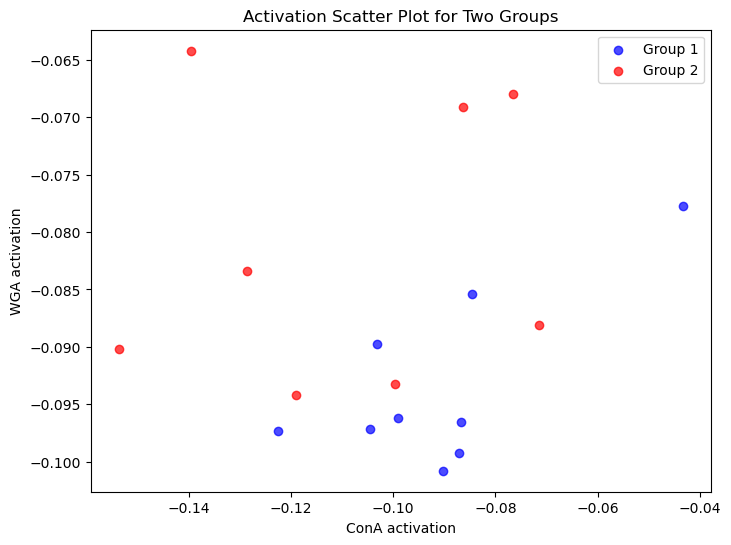

In [14]:
#aff_mat = np.heaviside(z_score_mat + 0.2, 0)
aff_mat = z_score_mat
#aff_mat = np.exp(0.2 * z_score_mat)
print(aff_mat)

def prob_dist(vals):
    return vals / np.sum(vals)

group1_list = list(df.columns)[1:-1:2]
group2_list = list(df.columns)[2:-1:2]


activation1_array = np.zeros((len(group1_list), 2))
for (i, g) in enumerate(group1_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation1_array[i,:] = np.dot(aff_mat, glycan_dist)


activation2_array = np.zeros((len(group2_list), 2))
for (i, g) in enumerate(group2_list):
    glycan_dist = prob_dist(np.array(df[g]))
    activation2_array[i,:] = np.dot(aff_mat, glycan_dist)

# Plot scatter plots for both groups
plt.figure(figsize=(8, 6))
plt.scatter(activation1_array[:,0], activation1_array[:,1], color='blue', label='Group 1', alpha=0.7)
plt.scatter(activation2_array[:,0], activation2_array[:,1], color='red', label='Group 2', alpha=0.7)

# Labels and legend
plt.xlabel('ConA activation')
plt.ylabel('WGA activation')
plt.title('Activation Scatter Plot for Two Groups')
plt.legend()
plt.show()